# Мельников Евгений 18ПМИ-1
# Малышева Екатерина 18ПМИ-2


In [ ]:
import numpy as np
import networkx as nx
from collections import defaultdict
import time

%matplotlib notebook
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генераторы графов

In [ ]:
# функция возвращает случайный простой граф в моделе Gnp 
# вероятность ребра p = 2*m/(n*(n-1)), чтобы среденее число ребер было = m
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_simple_Gnp_graph(n, m, seed=42):
  edge_p = 2*m/(n*(n-1))
  g = nx.random_graphs.fast_gnp_random_graph(n,edge_p,seed)
  
  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный ориентированный граф в моделе Gnp 
# вероятность ребра p = m/(n*(n-1)), чтобы среденее число ребер было = m
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_Gnp_digraph(n, m, seed=42):
  edge_p = m/(n*(n-1))
  g = nx.random_graphs.fast_gnp_random_graph(n,edge_p,seed,True)
  
  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный простой граф в моделе Gnm 
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_simple_Gnm_graph(n, m, seed=42):
  g = nx.random_graphs.gnm_random_graph(n,m,seed)

  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный ориентированный граф в моделе Gnm
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_Gnm_digraph(n, m, seed=42):
  g = nx.random_graphs.gnm_random_graph(n,m,seed,True)

  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает связный ориентированный Ейлеров граф
# в графе n вершин, k - параметр, от которого зависти генерация
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_Euler_digraph(n, k=8):
  in_degs, out_degs = [k]*n, [k]*n 
  G = nx.generators.directed_havel_hakimi_graph(in_degs, out_degs)
  WCCs = list(nx.algorithms.components.weakly_connected_components(G))
  if len(WCCs) > 1:
    connecting_nodes = []
    for WCC in WCCs:
      some_vertex_of_WCC = next(iter(WCC))
      connecting_nodes.append(some_vertex_of_WCC)
    for i in range(1, len(connecting_nodes)):
      G.add_edge(connecting_nodes[i-1],connecting_nodes[i])
      G.add_edge(connecting_nodes[i],connecting_nodes[i-1])
    
  return nx.convert.to_dict_of_lists(G)

In [ ]:
# утилитарная функция, переводящая таплы вида (1, 0, 0, 1)
# в числа, интерпетируя эту запись как число в двоичной записи
# эта функция нужна для следующей функции
def get_index_from_binary(tup):
  n = len(tup)
  mult = 1
  res = 0
  for i in range(n):
    res += tup[i]*mult
    mult *= 2
  return res

# функция возвращает связный ориентированный регулярный Ейлеров граф
# входные и выходные степени всех вершин совпадают и равны half_dim
# число вершин равно 4**half_dim
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_hypercube_digraph(half_dim):
  G = nx.generators.hypercube_graph(half_dim*2)
  directed_G = nx.DiGraph()
  Euler_circuit_G = nx.algorithms.eulerian_circuit(G)
  for (u,v) in Euler_circuit_G:
    directed_G.add_edge(get_index_from_binary(u), get_index_from_binary(v))
  return nx.convert.to_dict_of_lists(directed_G)

## Алгоритмы сортировки

In [ ]:
# поразрядная сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве
def radix_argsort(A):
    max_el=max(A)
    
    A_ind=[]# массив с индексами значений A (индекс, А[индекс])
    # заполняем массив (для того что бы в конце вывести индексы)
    for k in range(len(A)):
        A_ind.append((k, A[k]))
    pos=0
    n=len(A)
    while (max_el>>pos*8)>0:

        count_sorted=[0]*n# промежуточно отсортированный массив
        count=[0]*(2**8)
        for i in range (0,n):
            el=A_ind[i][1]>>pos*8
            index=bin(el)[2:]
            index=index[-8:]
            index=int(index,2)
            count[index]+=1


        for i in range(1,len(count)):
            count[i]+=count[i-1]# это для устойчивости 
        i=n-1# начинаем сортировать с конца
        while i>=0:
            el=A_ind[i][1]>>pos*8
            index=bin(el)[2:]
            index=index[-8:]
            index=int(index,2)

            count_sorted[count[index]-1]=A_ind[i]
            count[index]-=1
            i-=1
        for i in range(0,n):
            A_ind[i]=count_sorted[i]# делаем промежуточно отсортированный массив начальным
        pos+=1
        
    ind=[]
    for i in range(len(A)):
        ind.append(A_ind[i][0])# выводим из массива только индексы
    return ind

In [ ]:
# карманная сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве
def bucket_argsort(A):
    
    B=[] #карманы
    B_ind=[]
    n=len(A) 
    for i in range(n):
        B.append([])
        B_ind.append([])
    el_min=min(A)
    el_max=max(A)
    
    if el_min==el_max:
        return list(range(n))
    for i in range (n):
        a=A[i]
        pos=int(np.floor(n*((a-el_min)/(el_max-el_min))))
        if pos==n: 
            pos=n-1
        B[pos].append(a)
        B_ind[pos].append(i)
    
    sorted_A=[]
    sorted_A_ind=[]
    
    for i in range(n): #insertion sort и склейка карманов
        
        for j in range(1, len(B[i])): 
            sort_val = B[i][j] 
            sort_val_i=B_ind[i][j] 
            k=j-1
            while B[i][k] > sort_val and k>=0 :  
                B[i][k+1] = B[i][k]
                B_ind[i][k+1] = B_ind[i][k]
                k-=1
            B[i][k+1] = sort_val
            B_ind[i][k+1] = sort_val_i
                
        for j in range(len(B[i])):
            sorted_A.append(B[i][j])
            sorted_A_ind.append(B_ind[i][j])
            
    return sorted_A_ind

In [ ]:
# быстрая сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве

def partition(A,A_ind, st, fn, pivot):# [,)

    lbd=A[pivot]
    A[fn-1], A[pivot]=A[pivot], A[fn-1]# лямбда в конец
    A_ind[fn-1], A_ind[pivot]=A_ind[pivot], A_ind[fn-1]
    i=j=st
    pivot=fn# отмечаю новое положение pivot
    
    for k in range(st, fn-1):
        if A[k] <lbd:
            A[i], A[j]=A[j], A[i]
            A_ind[i], A_ind[j]=A_ind[j], A_ind[i]
            i+=1
            j+=1
        elif A[k]>lbd:
            j+=1
        elif A[k] ==lbd:
            if (i-st)>j-i:
                A[i], A[j]=A[j], A[i]
                A_ind[i], A_ind[j]=A_ind[j], A_ind[i]
                j+=1
            else:
                A[i], A[j]=A[j], A[i]
                A_ind[i], A_ind[j]=A_ind[j], A_ind[i]
                i+=1
                j+=1
    A[fn-1], A[i]=A[i], A[fn-1] 
    A_ind[fn-1], A_ind[i]=A_ind[i], A_ind[fn-1]     
    return i

def quick_argsort(A,A_ind, st,fn):
    '''if st==0 and fn==len(A):
        A_ind=[]
        for i in range(len(A)):            
            #A_ind.append((i, A[i]))
            A_ind.append(i)
        #A=A_ind'''
            
    while(fn-st>=8):
        pivot=randint(st, fn-1)
        pivot=partition(A, A_ind, st, fn, pivot)
        
        if (pivot-st<=fn-pivot-1):
            quick_argsort(A, A_ind,st,pivot)
            st=pivot+1
        else:
            quick_argsort(A,A_ind, pivot+1, fn)
            fn=pivot
    for i in range(st, fn): #insertion sort
        sort_val = A[i]
        sort_val_i=A_ind[i]
        k=i-1
        while A[k] > sort_val and k>=0 :  
            A[k+1] = A[k]
            A_ind[k+1] = A_ind[k]
            k-=1
        A[k+1] = sort_val
        A_ind[k+1] = sort_val_i
  
    return A_ind

## Алгоритмы для поиска мостов

In [ ]:
# детерминированный алгоритм для поиска мостов
# на вход поступает граф представленный списком смежности
# саписок представлен как словарь(хеш-таблица) списков
# выход представляет собой список ребер, являющихся мостами 
def compute_bridges_determ(adj_list): 
    global tick
    tick = -1 # таймер
    tick_in = dict() # время захода дфс в вершину
    tick_low = dict() # здесь для i-й вершины хранится наименьшее время захода dfs в предка, которого можно достигнуть из вершины
        # i за один шаг
    colors = dict() # словарь с цветами вершин 
    bridges = [] # список с мостами  
    
    for i in range(len(adj_list)):
        tick_in[i] = -1
        tick_low[i] = -1
        colors[i] = 'white' 
    
    def dfs_rec(current_node, prev_node): # current_node, prev_node (parent)
        colors[current_node] = 'grey' # помечаем текущую вершину как серую
        global tick 
        tick += 1  
        tick_in[current_node] = tick
        tick_low[current_node] = tick            
        
        for next_node in adj_list[current_node]: # проходимся по всем смежным вершинам 
            if colors[next_node] == 'white': 
                dfs_rec(next_node, current_node) # прямое ребро                
                tick_low[current_node] = min(tick_low[current_node], tick_low[next_node]) # после окончания dfs обновляем
                
                if (tick_in[current_node] < tick_low[next_node]): # это означает, что вершина next_node не соединена с каким-либо предком вершины current_node
                    # значит, мы нашли мост 
                    
                    if current_node > next_node: # чтобы меньший индекс стоял первым
                        bridges.append((next_node, current_node))
                    else: 
                        bridges.append((current_node, next_node))
                    
            elif colors[next_node] == 'grey': 
                if next_node == prev_node: # если при просмотре смежных серых вершин попадаем на родителя (prev), то пропускаем
                    continue 
                else: # если же при просмотре серых вершин не попадаем на родителя, то мы нашли обратное ребро
                    tick_low[current_node] = min(tick_low[current_node], tick_in[next_node])
                
        colors[current_node] = 'black' # как только просмотрели все смежные вершины, окрашиваем в черный 
        return   
    
    for vert in adj_list: # на тот случай, если граф несвязный
        if colors[vert] == 'white':
            dfs_rec(vert, vert) 
    
    return bridges

In [ ]:
# рандомизированный алгоритм для поиска мостов
# на вход поступает граф представленный списком смежности
# саписок представлен как словарь(хеш-таблица) списков 
# выход представляет собой список ребер, являющихся мостами с большой вероятностью

import numpy as np
from random import randint

def compute_bridges_rand(adj_list): 
    
    colors = dict() # словарь с цветами вершин
    marks = dict() # словарь с метками ребер (в нем для каждого ребра будет лежать число от 0 до max uint64 для xor)
    # Если метка ребра равна нулю (все биты равны нулю, то есть оно ни разу не было частью Эйлерова цикла), то оно - мост
    
    for i in adj_list:
        colors[i] = 'white' 
        for j in adj_list[i]:
            marks[(i, j)] = -1 # -1 означает, что алгоритм еще это ребро не смотрел 
    def dfs_rec(current_node, prev_node):
        colors[current_node] = 'grey' # помечаем текущую вершину как серую        
        xor_product = 0
        
        for next_node in adj_list[current_node]: # проходимся по всем смежным вершинам 
            if colors[next_node] == 'white': 
                prev_xor = dfs_rec(next_node, current_node) # накопленный на ребре xor
                marks[(current_node, next_node)] = prev_xor
                marks[(next_node, current_node)] = prev_xor                
                
            elif prev_node != next_node and colors[next_node] == 'grey': # проверяем, не просматриваем ли мы родительскую вершину              
                if (marks[(current_node, next_node)] == -1) and (marks[(next_node, current_node)] == -1): 
                    # если алгоритм еще не присвоил этому ребру случайное значение 
                    mark = randint(0, 18446744073709551615) # генерируем случайное число от 0 до max uint64
                    marks[(current_node, next_node)] = mark # присваиваем его ребру, не являющемуся частью dfs дерева (остовного дерева)
                    marks[(next_node, current_node)] = mark                    
        
        for next_node in adj_list[current_node]:
            if prev_node != next_node and (colors[next_node] == 'grey' or  colors[next_node] == 'black'):
                xor_product = xor_product ^ marks[(current_node, next_node)] # вычисляем для всех вершин, кроме родительской        
                
        colors[current_node] = 'black' # как только просмотрели все смежные вершины, окрашиваем в черный
        return xor_product # это xor всех инцидентных вершине current ребер    
    
    for vert in adj_list:
        if colors[vert] == 'white':
            dfs_rec(vert, vert)
    
    out_edge = []
    for edge in marks:
        if (edge[0] < edge[1]) and marks[edge] == 0:
            out_edge.append(edge)
    
    return out_edge
    

In [ ]:
# рандомизированный алгоритм для поиска 2-мостов
#
# на вход поступает граф представленный списком смежности и алгоритм сортировки для меток на ребрах
# саписок представлен как словарь(хеш-таблица) списков 
#
# выходом алгоритма является список списков ребер
# в каждом списке любая пара ребер должна с высокой вероятностью образовывать 2-мост
# например, если выходом является спискок [[e1, e2, e3],[e4, e5]]
# то с высокой вероятностью 2-мостами будут пары ребер: (e1,e2), (e1,e3), (e2,e3), (e4,e5)
# ребра здесь это пары вершин типа e1 = (1,2)
def compute_2bridges_rand(adj_list, sort_fun):
  # этот код нужно заменить на Ваш
    colors=dict()
    marks = dict()
    
    for i in adj_list:
        colors[i]='white'
        for j in adj_list[i]:
            marks[(i, j)] = -1
    
    # проходим по дереву как в алгоритме с мостами    
    def dfs_rec(cur_node, prev_node):
        colors[cur_node]='grey'
        xor = 0       
        for next_node in adj_list[cur_node]:
            if colors[next_node]=='white':
                #print(next_node, cur_node, 'turning grey')
                prev_xor = dfs_rec(next_node, cur_node)
                marks[(cur_node, next_node)] = prev_xor
                marks[(next_node, cur_node)] = prev_xor  
                
            elif prev_node != next_node and colors[next_node] == 'grey':            
                if (marks[(cur_node, next_node)] == -1) and (marks[(next_node, cur_node)] == -1): 
                    mark = randint(0, 18446744073709551615)
                    marks[(cur_node, next_node)] = mark 
                    marks[(next_node, cur_node)] = mark
        for next_node in adj_list[cur_node]:
            if prev_node != next_node and (colors[next_node] == 'grey' or  colors[next_node] == 'black'):
                xor = xor ^ marks[(cur_node, next_node)]
            
        colors[cur_node]='black'
        #print(cur_node, 'turning black')
        return xor  
    
    for i in adj_list:
        if colors[i]=='white':
            dfs_rec(i,i)
    
    out=[]# выходной массив
    pure_marks=[]# лист только с метками
    marks_1=[]# лист с ребрами и их метками (без ребер мостов)
    bridges=set()
    for edge in marks:
        if (edge[0] < edge[1]):# убираем повторяющиеся ребра
            marks_1.append((edge, marks[edge]))
            pure_marks.append(marks[edge])   

    if marks_1:
        if sort_fun==quick_argsort:
            marks_ind_start=list(range(len(pure_marks)))
            
            marks_ind=sort_fun(pure_marks, marks_ind_start, 0, len(pure_marks))# сортируем и получаем индексы
        else:
            marks_ind=sort_fun(pure_marks)
        sorted_marks_1=[]

            #заполняем отсортированный массив ребер и веток с помощью индексов    
        for i in range(len(marks_1)):
            sorted_marks_1.append(marks_1[marks_ind[i]])
        marks_1=sorted_marks_1

        el=0   
        while marks_1[el][1]==0 and el!=len(marks_1)-1:
            for k in range(el+1, len(marks_1)):
                out.append([marks_1[el][0], marks_1[k][0]])
            marks_1.pop(el)

        if marks_1[el][1]==0:#если последний тоже мост
             marks_1.pop(el)
                
        else:# если есть ребра не мосты
            #делим отсортированный массив на массивы одинаковых чисел
            counter=0# счетчик одинаковых меток
            j=len(out)-1# индекс последнего элемента выходного массива

            for i in range(0, len(marks_1)-1):#для каждого элемента массива 
                if marks_1[i][1]==marks_1[i+1][1]:#смотрим, если i-й равен следующему
                    if counter==0:# если предыдущие не были равны i-му, то есть счетчик равен 0
                        out.append([])# тогда добавляем новый список в выходной массив
                        j+=1# обновляем индекс выходного массива
                    counter+=1
                    out[j].append(marks_1[i][0])# добавляем элемент в список списков
                else:# если следующий не равен i-му
                     if counter>=1:# но счетчик не пуст (то естькак минимум предыдущий элемент был равен i-му)
                        out[j].append(marks_1[i][0])# добавляем элемент в список 
                        counter=0# и зануляем счетчик

            # обрабатываем последнй элемент массива на случай если он равен предыдущему
            if marks_1[len(marks_1)-1][1]==marks_1[len(marks_1)-2][1]:
                out[j].append(marks_1[len(marks_1)-1][0])
                
        
            

    return out


## Эйлеровы циклы

In [ ]:
from collections import deque
def compute_Euler_circuit_digraph(adj_list): 
    stack = list()
    cycle_stack = list()
    stack.append(0) # пусть начальная вершина - ноль
    visited_edges = list() # множество посещенных ребер 
    
    while len(stack) != 0: # если стек не пуст
        current_vert = stack[-1]         
        #visited_count = 0
        has_unvisited_edges = False
        
        for next_vert in adj_list[current_vert]: # смотрим все ребра, инцидентные current вершине          
            if (current_vert, next_vert) not in visited_edges: # если алгоритм еще не ходил по этому ребру
                visited_edges.append((current_vert, next_vert)) # добавляем это ребро в посещенные
                stack.append(next_vert) # добавляем вершину в стек, чтобы потом в нее войти 
                has_unvisited_edges = True # поднимаем флаг, что на этой итерации было найдено непосещенное ребро
                break
                
        if not has_unvisited_edges: # если у данной вершины не нашлось инцидентных непройденных ребер
            path_vert = stack.pop(-1)       
            cycle_stack.append(path_vert) # запоминаем ее, как часть эйлерова цикла
            
    out_path = []   
    current_vert = cycle_stack.pop(-1)
    while len(cycle_stack) != 0:
        next_vert = cycle_stack.pop(-1)  
        out_path.append((current_vert, next_vert))
        current_vert = next_vert
    return out_path  

## Арифметика в конечных кольцах и полях

In [ ]:
# эта функция инвертирует x в Zp с помощью алгоритма Евклида
# выходом является целое число y, такое что
# 1) 0 < y < p 
# 2) (xy) mod p = 1 
# если число невозможно инвертировать, функция возвращает 0
def invert_in_Zp_Euclead(p,x):   
    if x <= 0:
        return 0
    elif x >= p:
        return -1
    elif x == 1:
        return 1
    else:
               
        # значения на позапрошлой итерации
        v_prev_prev = 1
        u_prev_prev = 0
        remainder_prev_prev = p*v_prev_prev + x*u_prev_prev # a_i-2 (a0)      
        
        # значения на прошлой итерации
        v_prev = 0        
        u_prev = 1   
        remainder_prev = p*v_prev + x*u_prev # a_i-1 (a1)        
        #q_prev = remainder_prev_prev // remainder_prev # quotient # not used
        
        # значения на текующей итерации
        gcd_now = 0
        
        while (remainder_prev_prev % remainder_prev > 0):
            
            remainder_now = remainder_prev_prev % remainder_prev
            quotient_now = remainder_prev_prev // remainder_prev
            v_now = v_prev_prev - v_prev*(quotient_now) # вычетание строк
            u_now = u_prev_prev - u_prev*(quotient_now) # вычетание строк 
                        
            if (remainder_now == 1):
                if (u_now > 0):
                    return u_now
                if (u_now < 0): 
                    return p + u_now
            else:               

                remainder_prev_prev = remainder_prev
                remainder_prev = remainder_now

                v_prev_prev = v_prev 
                v_prev = v_now

                u_prev_prev = u_prev
                u_prev = u_now                
                                
    return 0 

In [ ]:
# эта функция инвертирует x в Zp с помощью малой теоремы Ферма и алгоритма быстрого возведения в степень
# выходом является целое число y, такое что
# 1) 0 < y < p 
# 2) (xy) mod p = 1 
# если число невозможно инвертировать, функция возвращает 0, а если же число не входит в Z_p, то возвращает -1
def fast_exponentiation(x, n):
    if n == 1:
        return x
    elif n == 0:
        return 1
    elif n % 2 == 0:
        return fast_exponentiation(x*x, n/2)
    elif n % 2 == 1:
        return fast_exponentiation(x*x, n // 2)*x

def invert_in_Zp_Ferma(p,x):
    # проверка, входит ли число x в Z_p
    if x < 0:
        return -1  
    elif x >= p:
        return -1
    elif x == 0: # у нуля не существует обратного
        return 0    
    else:
        # проверяем числа на взаимную простоту 
        a = p
        b = x 
        while (a != 0 and b != 0):
            if a >= b:
                (a, b) = (b, a % b) 
            elif b > a:
                (a, b) = (a, b % a)
            gcd = a            
        if gcd == 1:
            return fast_exponentiation(x, p-2) % p
        else:
            return 0 # числа не взаимно простые, обратного не существует 

## Стресс тесты

In [ ]:
def stress_test_bridges_determ(n, m, iterations_num=1000):
  for i in range(iterations_num):
    G = get_random_simple_Gnp_graph(n, m, i)
    briges_test = compute_bridges_determ(G)
    bridges_true = set(nx.algorithms.bridges(nx.Graph(G)))
    diff = list(bridges_true.symmetric_difference(briges_test))
    if len(diff) > 0:
      raise Exception(f"Неверное решение в детерминированном алгоритме поиска мостов, n: {n}, m: {m}, seed: {i}")
  print(f"Стресс тест для детерминированного поиска мостов пройден!, n: {n}, m: {m}, iterations_num: {iterations_num}")
    

In [ ]:
def stress_test_bridges_rand(n, m, iterations_num=1000):
  exp_err = m * (1/ (2**64))
  for i in range(iterations_num):
    G = get_random_simple_Gnp_graph(n, m, i) 
    # тут, видимо, ошибка
    # briges_test = compute_bridges_determ(G)
    briges_test = compute_bridges_rand(G)
    bridges_true = set(nx.algorithms.bridges(nx.Graph(G)))
    diff = list(bridges_true.symmetric_difference(briges_test))
    if len(diff) > exp_err:
      raise Exception(f"Число ошибок в рандомизированном алгоритме поиска мостов превышено, n: {n}, m: {m}, errors_num: {len(diff)}, seed: {i}")
  print(f"Стресс тест для рандомизированного поиска мостов пройден!, n: {n}, m: {m}, iterations_num: {iterations_num}")
    

In [ ]:
def stress_test_finite_fields(p = 2**61-1, iterations_num = 100000):
  for i in range(iterations_num):
    x = numpy.random.randint(1, p)
    inverse_Euclead_x = invert_in_Zp_Euclead(p,x)
    inverse_Ferma_x = invert_in_Zp_Ferma(p,x)
    if( np.gcd(p,x) == 1 ):
      if (x * inverse_Euclead_x - 1) % p != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом Евклида, p: {p}, x: {x}")
      if (x * inverse_Ferma_x - 1) % p != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом быстрого возведения в степень, p: {p}, x: {x}")
    else :
      if inverse_Euclead_x != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом Евклида, p: {p}, x: {x}")
      if inverse_Ferma_x != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом быстрого возведения в степень, p: {p}, x: {x}")  
  print(f"Стресс тест для арифметики в конечных полях пройден!, p: {p}, iterations_num: {iterations_num}")

In [ ]:
def stress_test_2bridges_rand(n, m, sort, iterations_num=1000):
  exp_err = (m*(m-1)/2) * (1/ (2**64))
  for iteration in range(iterations_num):
    err_num = 0
    G = nx.Graph(get_random_simple_Gnp_graph(n, m, iteration))
    bridges_test = compute_2bridges_rand(G,sort)
    for edge_group in bridges_test:
      for e1 in range(len(edge_group)):
        for e2 in range(e1+1,len(edge_group)):
          G_with_deleted_2bridge = G.copy()
          G_with_deleted_2bridge.remove_edge(*edge_group[e1])
          G_with_deleted_2bridge.remove_edge(*edge_group[e2])
          if nx.connected.number_connected_components(G) == nx.connected.number_connected_components(G_with_deleted_2bridge):
            ++err_num
    if err_num > exp_err:
      raise Exception(f"Число ошибок в рандомизированном алгоритме поиска мостов превышено, n: {n}, m: {m}, errors_num: {err_num}, sort: {sort}, seed: {iteration}")
  print(f"Стресс тест для рандомизированного поиска 2 мостов пройден!, n: {n}, m: {m}, , sort: {sort}, iterations_num: {iterations_num}")

In [ ]:
def test_Euler_circuit(G, test_circuit):
  edges_dict = {}
  m = 0
  for (v,neib) in G.items():
    for u in neib:
      edges_dict[(v,u)] = False
      m += 1

  l = len(test_circuit)
  if m != l:
    return False

  for i in range(1,m):
    if test_circuit[i-1][1] != test_circuit[i][0]:
      return False
  if test_circuit[l-1][1] != test_circuit[0][0]:
    return False

  for e in test_circuit:
    if edges_dict.get(e, True) == True:
      return False
    else:
      edges_dict[e] = True
    
  return True

# max_n должно быть строго больше чем 10
def stress_test_Euler_circuit_digraph(max_n, iterations_num=1000):
  for iteration in range(iterations_num):
    n = np.random.randint(10, max_n)
    k = np.floor(n/4)
    G = get_Euler_digraph(n,k)
    test_circuit = compute_Euler_circuit_digraph(G)
    if not test_Euler_circuit(G, test_circuit):
      raise Exception(f"Неправильный Эйлеров обход, функция генерации: get_Euler_digraph, n: {n}, k: {k}")
    print(f'n: {n}, k: {k}')
  print(f"Стресс тест для ориентированных Эйлеровых циклов пройден, max_n: {max_n}, iterations_num: {iterations_num}")

In [ ]:
stress_test_bridges_determ(100,30,100)
stress_test_bridges_rand(100,30,100)
stress_test_finite_fields(2347, 1000)
stress_test_2bridges_rand(1000,1000,radix_argsort,2)
stress_test_2bridges_rand(1000,1000,bucket_argsort,2)
stress_test_2bridges_rand(1000,1000,quick_argsort,2)
stress_test_Euler_circuit_digraph(300, 20) 

Стресс тест для детерминированного поиска мостов пройден!, n: 100, m: 30, iterations_num: 100
Стресс тест для рандомизированного поиска мостов пройден!, n: 100, m: 30, iterations_num: 100
Стресс тест для арифметики в конечных полях пройден!, p: 2347, iterations_num: 1000
Стресс тест для рандомизированного поиска 2 мостов пройден!, n: 1000, m: 1000, , sort: <function radix_argsort at 0x7f840de43560>, iterations_num: 2
Стресс тест для рандомизированного поиска 2 мостов пройден!, n: 1000, m: 1000, , sort: <function bucket_argsort at 0x7f840de43cb0>, iterations_num: 2
Стресс тест для рандомизированного поиска 2 мостов пройден!, n: 1000, m: 1000, , sort: <function quick_argsort at 0x7f840e2f3e60>, iterations_num: 2
n: 125, k: 31.0
n: 33, k: 8.0
n: 285, k: 71.0
n: 147, k: 36.0
n: 243, k: 60.0
n: 162, k: 40.0
n: 124, k: 31.0
n: 78, k: 19.0
n: 180, k: 45.0
n: 14, k: 3.0
n: 71, k: 17.0
n: 157, k: 39.0
n: 262, k: 65.0
n: 217, k: 54.0
n: 277, k: 69.0
n: 169, k: 42.0
n: 295, k: 73.0
n: 20, k: 5.0


## Юнит тесты

In [32]:
def finite_fields_unit_tests():
  assert(invert_in_Zp_Euclead(6,4) == 0)
  assert(invert_in_Zp_Ferma(6,4) == 0)

  assert(invert_in_Zp_Euclead(6,2) == 0)
  assert(invert_in_Zp_Ferma(6,2) == 0)

  assert(invert_in_Zp_Euclead(2347,0) == 0)
  assert(invert_in_Zp_Ferma(2347,0) == 0)

  assert(invert_in_Zp_Euclead(7,6) == 6)
  assert(invert_in_Zp_Ferma(7,6) == 6)

  assert(invert_in_Zp_Euclead(2347,2346) == 2346)
  assert(invert_in_Zp_Ferma(2347,2346) == 2346)

  assert(invert_in_Zp_Euclead(1,0) == 0)
  assert(invert_in_Zp_Ferma(1,0) == 0)

  assert(invert_in_Zp_Euclead(2,0) == 0)
  assert(invert_in_Zp_Ferma(2,0) == 0)

  assert(invert_in_Zp_Euclead(2,1) == 1)
  assert(invert_in_Zp_Ferma(2,1) == 1)

In [33]:
def bridges_unit_test(G):
  test_bridges_determ = compute_bridges_determ(nx.convert.to_dict_of_lists(G))
  test_bridges_rand = compute_bridges_rand(nx.convert.to_dict_of_lists(G))
  true_bridges = set(nx.algorithms.bridges(nx.Graph(G)))
  determ_diff = list(true_bridges.symmetric_difference(test_bridges_determ))
  rand_diff = list(true_bridges.symmetric_difference(test_bridges_rand))
  assert len(determ_diff) == 0
  assert len(rand_diff) == 0

In [34]:
def two_bridges_unit_test(G, sort_fun):
  test_bridges = compute_2bridges_rand(nx.convert.to_dict_of_lists(G), sort_fun)
  for edge_group in test_bridges:
      for e1 in range(len(edge_group)):
        for e2 in range(e1+1,len(edge_group)):
          G_with_deleted_2bridge = G.copy()
          G_with_deleted_2bridge.remove_edge(*edge_group[e1])
          G_with_deleted_2bridge.remove_edge(*edge_group[e2])
          assert nx.connected.number_connected_components(G) < nx.connected.number_connected_components(G_with_deleted_2bridge)

In [35]:
def Euler_circuit_unit_tests():
  dims = [1, 2, 3, 4, 5, 6]
  for dim in dims:
    G = get_hypercube_digraph(dim)
    test_circuit = compute_Euler_circuit_digraph(G)
    assert(test_Euler_circuit(G,test_circuit))

In [36]:
finite_fields_unit_tests()
print("Все юнит тесты для арифметики в конечных полях пройдены успешно!")

bridges_unit_test(nx.generators.cycle_graph(10))
bridges_unit_test(nx.generators.path_graph(10))
bridges_unit_test(nx.generators.empty_graph(10))
bridges_unit_test(nx.generators.wheel_graph(10))
bridges_unit_test(nx.generators.trivial_graph())
bridges_unit_test(nx.generators.balanced_tree(3,3))
print("Все юнит тесты для поиска мостов пройдены успешно!")

sort_functions = [radix_argsort, bucket_argsort, quick_argsort]
#sort_functions = [radix_argsort, bucket_argsort]
for sort_fun in sort_functions:
  two_bridges_unit_test(nx.generators.cycle_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.path_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.empty_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.wheel_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.trivial_graph(), sort_fun)
  two_bridges_unit_test(nx.generators.balanced_tree(3,3), sort_fun)
print("Все юнит тесты для поиска 2-мостов пройдены успешно!")

Euler_circuit_unit_tests()
print("Все юнит тесты для поиска Эйлеровых циклов пройдены успешно!")


Все юнит тесты для арифметики в конечных полях пройдены успешно!
Все юнит тесты для поиска мостов пройдены успешно!
Все юнит тесты для поиска 2-мостов пройдены успешно!
Все юнит тесты для поиска Эйлеровых циклов пройдены успешно!


# Графики

In [37]:
def check_time(f, *args):
  start = time.time()
  f(*args)
  return time.time() - start


In [38]:
def plot_bridges(m_fun, start = 100, step = 100, end = 1000, number_of_retryes = 100): 
  _x, determ_Gnp_y, determ_Gnm_y, rand_Gnp_y, rand_Gnm_y = [], [], [], [], []
  for n in range(start,end,step):
    m = m_fun(n)
    time_Gnp_determ = 0.
    time_Gnp_rand = 0.
    time_Gnm_determ = 0.
    time_Gnm_rand = 0.
    for exp_num in range(number_of_retryes):
      g = get_random_simple_Gnp_graph(n,m,exp_num)
      time_Gnp_determ += check_time(compute_bridges_determ, g)
      time_Gnp_rand += check_time(compute_bridges_rand, g)
      g = get_random_simple_Gnm_graph(n,m,exp_num)
      time_Gnm_determ += check_time(compute_bridges_determ, g)
      time_Gnm_rand += check_time(compute_bridges_rand, g)
    time_Gnp_determ /= number_of_retryes
    time_Gnp_rand /= number_of_retryes
    time_Gnm_determ /= number_of_retryes
    time_Gnm_rand /= number_of_retryes
    _x.append(n)
    determ_Gnp_y.append(time_Gnp_determ)
    rand_Gnp_y.append(time_Gnp_rand)
    determ_Gnm_y.append(time_Gnm_determ)
    rand_Gnm_y.append(time_Gnm_rand)

  plt.plot(_x, determ_Gnp_y, label = "determ Gnp")
  plt.plot(_x, rand_Gnp_y, label = "rand Gnp")
  plt.plot(_x, determ_Gnm_y, label = "determ Gnm")
  plt.plot(_x, rand_Gnm_y, label = "rand Gnm")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.xlabel('number of vertices')
  plt.ylabel('time s.')
  plt.title(f"Эксперименты с мостами, start: {start}, step: {step}, end: {end},\n \
  number of retryes: {number_of_retryes}, edges density: {n/m}")
  #plt.figure(figsize= (1000,1000))
  plt.show()

In [39]:
def plot_2bridges(m_fun, start = 100, step = 100, end = 1000, number_of_retryes = 5): 
  _x = []
  quick_Gnp, radix_Gnp, bucket_Gnp, standard_Gnp = [], [], [], []
  quick_Gnm, radix_Gnm, bucket_Gnm, standard_Gnm = [], [], [], []

  for n in range(start,end,step):
    m = m_fun(n)
    time_quick_Gnp, time_radix_Gnp, time_bucket_Gnp, time_standard_Gnp = 0., 0., 0., 0.
    time_quick_Gnm, time_radix_Gnm, time_bucket_Gnm, time_standard_Gnm = 0., 0., 0., 0.

    for exp_num in range(number_of_retryes):
      g = get_random_simple_Gnp_graph(n,m,exp_num)
      time_quick_Gnp += check_time(compute_2bridges_rand,g,quick_argsort)
      time_bucket_Gnp += check_time(compute_2bridges_rand,g,bucket_argsort)
      time_radix_Gnp += check_time(compute_2bridges_rand,g,radix_argsort)
      time_standard_Gnp += check_time(compute_2bridges_rand,g,np.argsort)

      g = get_random_simple_Gnm_graph(n,m,exp_num)
      time_quick_Gnm += check_time(compute_2bridges_rand,g,quick_argsort)
      time_bucket_Gnm += check_time(compute_2bridges_rand,g,bucket_argsort)
      time_radix_Gnm += check_time(compute_2bridges_rand,g,radix_argsort)
      time_standard_Gnm += check_time(compute_2bridges_rand,g,np.argsort)

    time_quick_Gnp /= number_of_retryes
    time_bucket_Gnp /= number_of_retryes
    time_radix_Gnp /= number_of_retryes
    time_standard_Gnp /= number_of_retryes

    time_quick_Gnm /= number_of_retryes
    time_bucket_Gnm /= number_of_retryes
    time_radix_Gnm /= number_of_retryes
    time_standard_Gnm /= number_of_retryes

    _x.append(n)

    quick_Gnp.append(time_quick_Gnp)
    bucket_Gnp.append(time_bucket_Gnp)
    radix_Gnp.append(time_radix_Gnp)
    standard_Gnp.append(time_standard_Gnp)

    quick_Gnm.append(time_quick_Gnm)
    bucket_Gnm.append(time_bucket_Gnm)
    radix_Gnm.append(time_radix_Gnm)
    standard_Gnm.append(time_standard_Gnm)

  plt.plot(_x, quick_Gnp, label = "quick Gnp") 
  plt.plot(_x, bucket_Gnp, label = "bucket Gnp")
  plt.plot(_x, radix_Gnp, label = "radix Gnp")
  plt.plot(_x, standard_Gnp, label = "standard Gnp")

  plt.plot(_x, quick_Gnm, label = "quick Gnm")
  plt.plot(_x, bucket_Gnm, label = "bucket Gnm")
  plt.plot(_x, radix_Gnm, label = "radix Gnm")
  plt.plot(_x, standard_Gnm, label = "standard Gnm")

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.xlabel('number of vertices')
  plt.ylabel('time s.')
  plt.title(f"Эксперименты с 2-мостами, start: {start}, step: {step}, end: {end},\n \
  number of retryes: {number_of_retryes}, edges density: {n/m}")
  #plt.figure(figsize= (100000,100000))
  plt.show()

## Разреженные

In [41]:
import sys
sys.setrecursionlimit(10000)

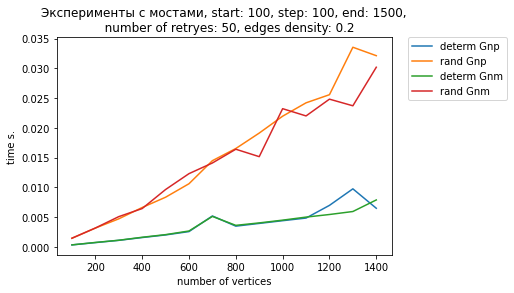

Total time: 47.18645453453064


In [42]:
print(f"Total time: {check_time(plot_bridges, lambda n: 5*n, 100, 100, 1500, 50)}")

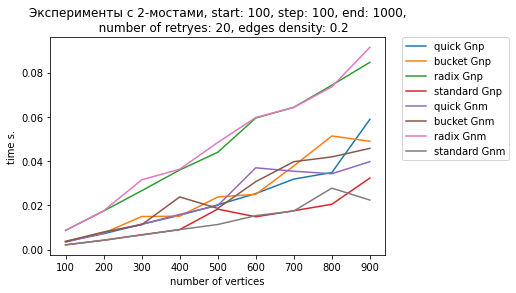

Total time: 42.56608247756958


In [43]:
print(f"Total time: {check_time(plot_2bridges, lambda n: 5*n, 100, 100, 1000, 20)}")

## Плотные

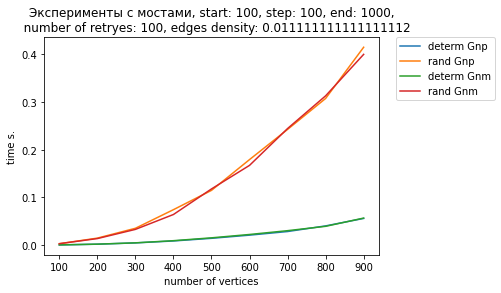

Total time: (516.1898546218872, 100, 100, 1000, 10)


In [44]:
print(f"Total time: {check_time(plot_bridges, lambda n: (n**2)/10),  100, 100, 1000, 10}")

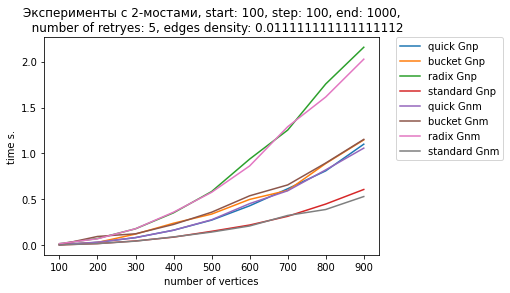

Total time: (174.7935128211975, 100, 100, 1000, 5)


In [45]:
print(f"Total time: {check_time(plot_2bridges, lambda n: (n**2)/10), 100, 100, 1000, 5}")